In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

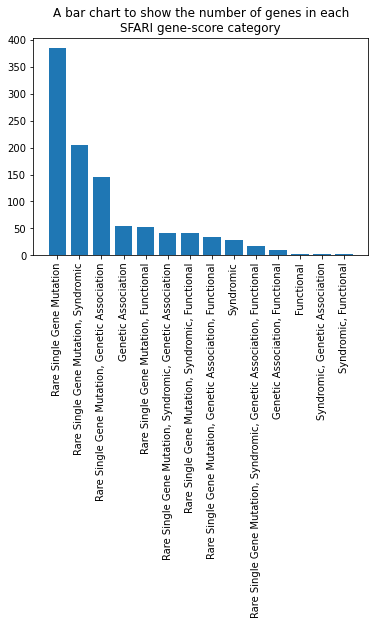

In [71]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.bar(gene_cat_vals, gene_cat_counts)
plt.xticks(rotation=90)
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

# task 2

In [82]:
ranked_data = data.sort_values("number-of-reports")
print(ranked_da)

status                                       9
gene-symbol                             ZWILCH
gene-name            zwilchkinetochore protein
ensembl-id                     ENSG00000174442
chromosome                                  15
genetic-category     Rare Single Gene Mutation
gene-score                                 3.0
syndromic                                    0
number-of-reports                            4
Name: 1022, dtype: object

# task 3

# task 4

# task 5